In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

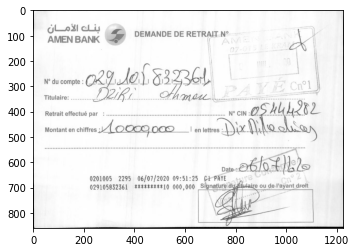

In [86]:
img = cv2.imread('/home/yasmine/Téléchargements/data_img/img29.jpg')

width=1225
height=856
dim=(width,height)
#img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(img)

In [87]:
def veriferavant(row):
    #print(row)
    n=0
    i=1
    while vertical_projection[row-i]==0:
        #print(row-i)
        n=n+1
        i=i+1
        if n > 10:
            break
    #print(n)
    return n
def veriferarriere(row,width):
    n=0
    i=1
    
    #r=row+i
    if((row+i) < int(width)-1) :
        
        while vertical_projection[row+i]==0 :
            n=n+1
            #print("n=",n)
            i=i+1
        
            if n > 10 or row+i>int(width)-1:
                print(n)
                break
    return n   

In [88]:
def segmentation(width,height,inputImage):
    
    start=0
    end=0
    j=0
    for row in range(width):
        #print(row,vertical_projection[row])
        #print(horizontal_projection[row+1])
        if vertical_projection[row-1]==0 and vertical_projection[row]!=0 and veriferavant(row-1)>10:
        
            start=row-1
            #print("s",start)
        #print(veriferarriere(row+1,width))
        if vertical_projection[row-1]!=0 and vertical_projection[row]==0  and veriferarriere(row,width)>10:
            end=row+1
            #print("e",end)
            
            if(end-start>50):
                roi=inputImage[0:height,start:end]
                cv2.imwrite("word"+str(j)+".png",roi)
                start=0
                end=0
                #plt.imshow(roi)
                j=j+1
  
            
            
    
        
    
        

77 457
11


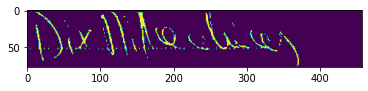

In [89]:

with open('/home/yasmine/Téléchargements/file.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        #print(row)
        if row[0]=="montant_en_lettres":
            cv2.rectangle(img, (int(row[1]), int(row[2])), (int(row[3]), int(row[4])), (0, 255, 0), 3)
            img_cropped = img[int(row[2]):int(row[4]), int(row[1]):int(row[3])]
            h,w,c=img_cropped.shape
            print(h,w)
            #inputImage = cv2.imread('word3.png')
            image=img_cropped.copy()
            #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

            #horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
            #detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,
            #horizontal_kernel, iterations=2)

            #cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            #cnts = cnts[0] if len(cnts) == 2 else cnts[1]

            #for c in cnts:
                #cv2.drawContours(image, [c], -1, (255, 255, 255), 2)

            #repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 6))

            #result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel,iterations=1)
            
            grayImage= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #GaussianFilter= cv2.GaussianBlur(grayImage, (5,5), 0)
            _, binarizedImage = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
            binarizedImage[binarizedImage == 0] = 1
            binarizedImage[binarizedImage == 255] = 0
            plt.imshow(binarizedImage)
            vertical_projection = np.sum(binarizedImage, axis=0)
            #plt.plot(vertical_projection)
            #plt.show()
            segmentation(w,h,img_cropped)
            